# Exploratory analysis: Mouse strain phenotypes

__Systems proteomics of liver mitochondria function__      
by Evan G. Williams, Yibo Wu, Pooja Jha, Sébastien Dubuis et al.     
_Science_     
Volume 352(6291):[aad0189](http://science.sciencemag.org/content/352/6291/aad0189)    
June 10, 2016, [doi:10.1126/science.aad0189](doi:10.1126/science.aad0189)

The __supplemental files__ are listed here: http://science.sciencemag.org/content/suppl/2016/06/10/352.6291.aad0189.DC1

We further include some methodology discussed in a related paper about mouse-human PheWAS (Phenome wide association studies)

__Joint mouse–human phenome-wide association to test gene function and disease risk__ <br>
by Xusheng Wang, Ashutosh K. Pandey, Megan K. Mulligan, Evan G. Williams et al.     
_Nature Communications_     
Volume 7, Article number: 10464, [doi:10.1038/ncomms10464](doi:10.1038/ncomms10464)     

In [1]:
# imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# change some defaults for better images
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.mpl.rc("figure", figsize=(20,15))

# Phenotype overview

We now turn to the phenotype data found in the Excel-sheet `aad0189_DataFileS2.xlsx` we had downloaded earlier. Take a couple of minutes looking at it in a spreadsheet viewer.

The BXD mouse phenotype data has been accumulated over the past 50 years, with various measurements being available for different mice and different tissue types. The data provided by the paper supplement is structured as a multi-sheet Excel spreadsheet - you can open it in the corresponding software to get a first impression about the structure of the file.

### Load phenotype file into a pandas DataFrames `phenotypes`

The file contains multiple sheets. Pandas can load all of them into a single dictionary, whose keys correspond to sheet names, and values correspond to sheet contents as DataFrames.

Do the sheets have missing values? How are they encoded? Change your importing parameters accordingly.

In [3]:
phenotypes = pd.read_excel('../example_data/aad0189_DataFileS2.xlsx', sheet_name=None, index_col=0, na_values = 'x')

### List all sheet names

In [4]:
phenotypes.keys()

dict_keys(['Body Wt & Composition', 'NIBP', 'CLAMS', 'OGTT', 'ColdTest', 'TSE', 'VO2Max', 'Activity Wheel', 'Tissue_W', 'Biochemistry', 'Hematology', 'NEW'])

### Peek into the a sheet of your choice

You can use the DataFrame method `.head()`.

In [5]:
phenotypes['Body Wt & Composition'].head()

,CD_Sacrifice_Order_[Rank],SE,N,HFD_Sacrifice_Order_[Rank],SE.1,N.1,CD_Sacrifice_Order_[Weeks],SE.2,N.2,HFD_Sacrifice_Order_[Weeks],...,N.54,HFD_FatMassLoss_AfterExercise_[%],SE.55,N.55,CD_BodyWeightLoss_PreSacrifice_[g],SE.56,N.56,s,SE.57,N.57
@format=column,,,,,,,,,,,,,,,,,,,,,
C57BL/6J,8,NaN,5,8.0,NaN,5.0,13,NaN,5,13.0,...,4.0,16.588260,5.337070,4.0,NaN,NaN,NaN,NaN,NaN,NaN
DBA/2J,8,NaN,5,8.0,NaN,5.0,13,NaN,5,13.0,...,3.0,51.727700,11.667592,5.0,1.3275,0.425000,4.0,1.072,0.323000,5.0
BXD1,42,NaN,5,43.0,NaN,5.0,189,NaN,5,202.0,...,5.0,44.507126,0.913560,5.0,3.0000,0.480000,5.0,1.820,0.255284,5.0
BXD2,54,NaN,4,54.0,NaN,5.0,300,NaN,4,300.0,...,4.0,16.436399,6.400797,5.0,1.4325,0.694963,4.0,2.662,0.239529,5.0
BXD6,48,NaN,5,51.0,NaN,5.0,287,NaN,5,292.0,...,5.0,9.440129,2.125612,5.0,1.8340,0.383401,5.0,2.168,0.093563,5.0


### List all columns of the Biochemistry sheet

What do all those columns `SE` and `N` mean? 

SE: standard error, N: number of Sample.

In [6]:
phenotypes['Biochemistry'].head()

,CD_Glucose_[mmol/L],SE,N,HFD_Glucose_[mmol/L],SE.1,N.1,CD_Cholesterol_[mmol/L],SE.2,N.2,HFD_Cholesterol_[mmol/L],...,N.48,HFD_IL6_[pg/mL],SE.49,N.49,HFD_IL18_[pg/mL],SE.50,N.50,HFD_RANTES_[pg/mL],SE.51,N.51
@format=column,,,,,,,,,,,,,,,,,,,,,
C57BL/6J,15.100,0.611010,3.0,21.46,1.341492,5.0,3.666667,0.218581,3,5.60,...,5.0,6.92,0.666093,5.0,351.28,99.4,5.0,9.312,3.50,5.0
DBA/2J,15.350,0.417333,4.0,16.38,1.269410,5.0,3.550000,0.170783,4,4.44,...,4.0,6.95,1.562765,4.0,724.50,136.4,4.0,11.350,1.99,4.0
BXD1,8.900,1.331540,5.0,13.92,2.293992,5.0,2.920000,0.177200,5,3.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD6,14.975,1.461378,4.0,12.92,1.107429,5.0,2.725000,0.170171,4,3.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look at the variability across different strains for some phenotypes

Examples:
- basal body temperature
- alkaline phosphatase (ALPL) protein activity level
- weight after 28 weeks

Create a histogram out of 2-3 phenotype measurements of your choice.

Text(0, 0.5, 'count')

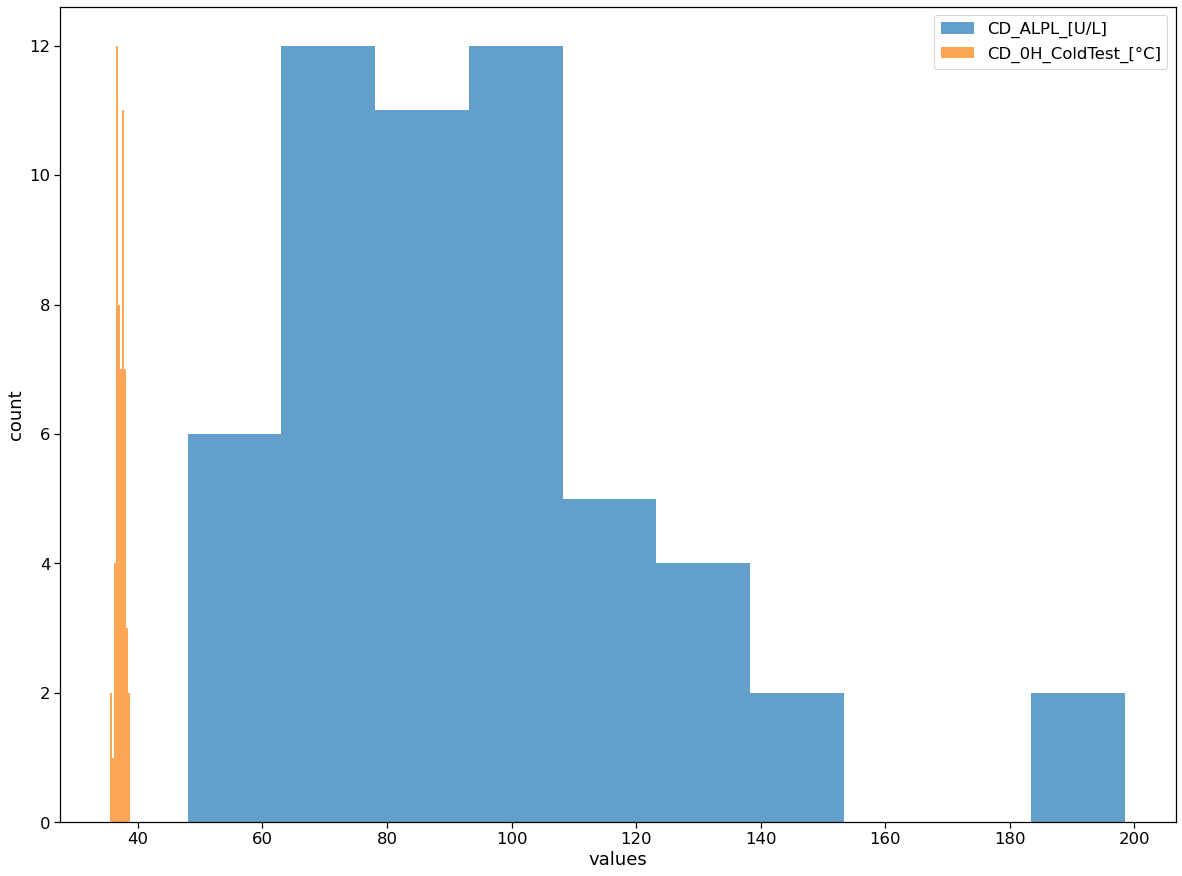

In [7]:
ALPL = phenotypes['Biochemistry']['CD_ALPL_[U/L]']
temperature = phenotypes['ColdTest']['CD_0H_ColdTest_[°C]']

hists = [ALPL, temperature]
for h in hists:
    plt.hist(h, label = h.name, alpha = 0.7)
plt.legend()
plt.xlabel('values')
plt.ylabel('count')

array([[<AxesSubplot:title={'center':'CD_DiastolicBP_NIBP_[mmHg]'}>,
        <AxesSubplot:title={'center':'HFD_DiastolicBP_NIBP_[mmHg]'}>],
       [<AxesSubplot:title={'center':'CD_SystolicBP_NIBP_[mmHg]'}>,
        <AxesSubplot:title={'center':'HFD_SystolicBP_NIBP_[mmHg]'}>],
       [<AxesSubplot:title={'center':'CD_HeartRate_NIBP_[bpm]'}>,
        <AxesSubplot:title={'center':'HFD_HeartRate_NIBP_[bpm]'}>]],
      dtype=object)

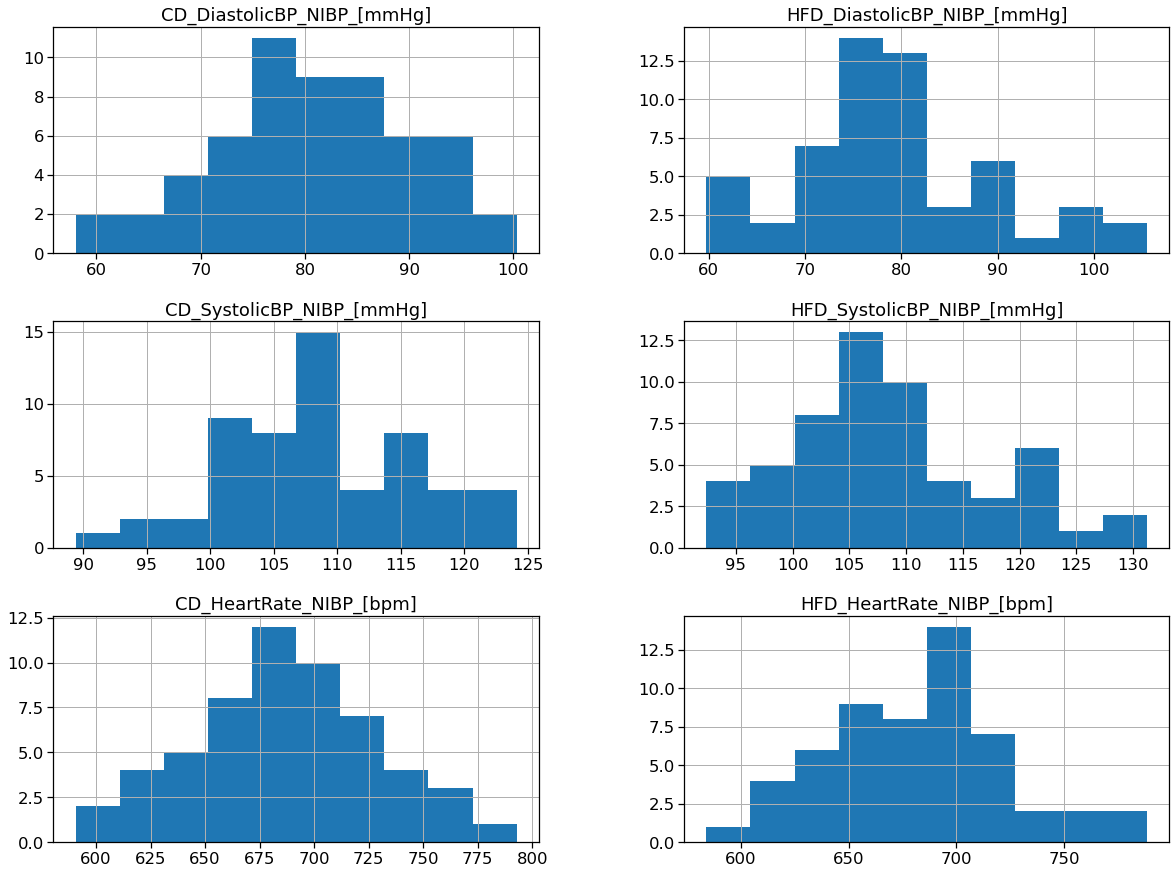

In [8]:
phenotypes['NIBP'].iloc[:, 0::3].hist()

### Compare 'Activity Wheel' values across strains, diets and times

The diets are CD (Choline Deficient) and HFD (High Fat Diet).

Use a seaborn `pairplot` to display all pairwise comparisons at once. Add regressions to the pairplot.

Interpret the similarities and differences between strains, diets and the time of day. E.g: At what time of the day do mice tend to run most? Do mice that run a lot during the day run less in the night?

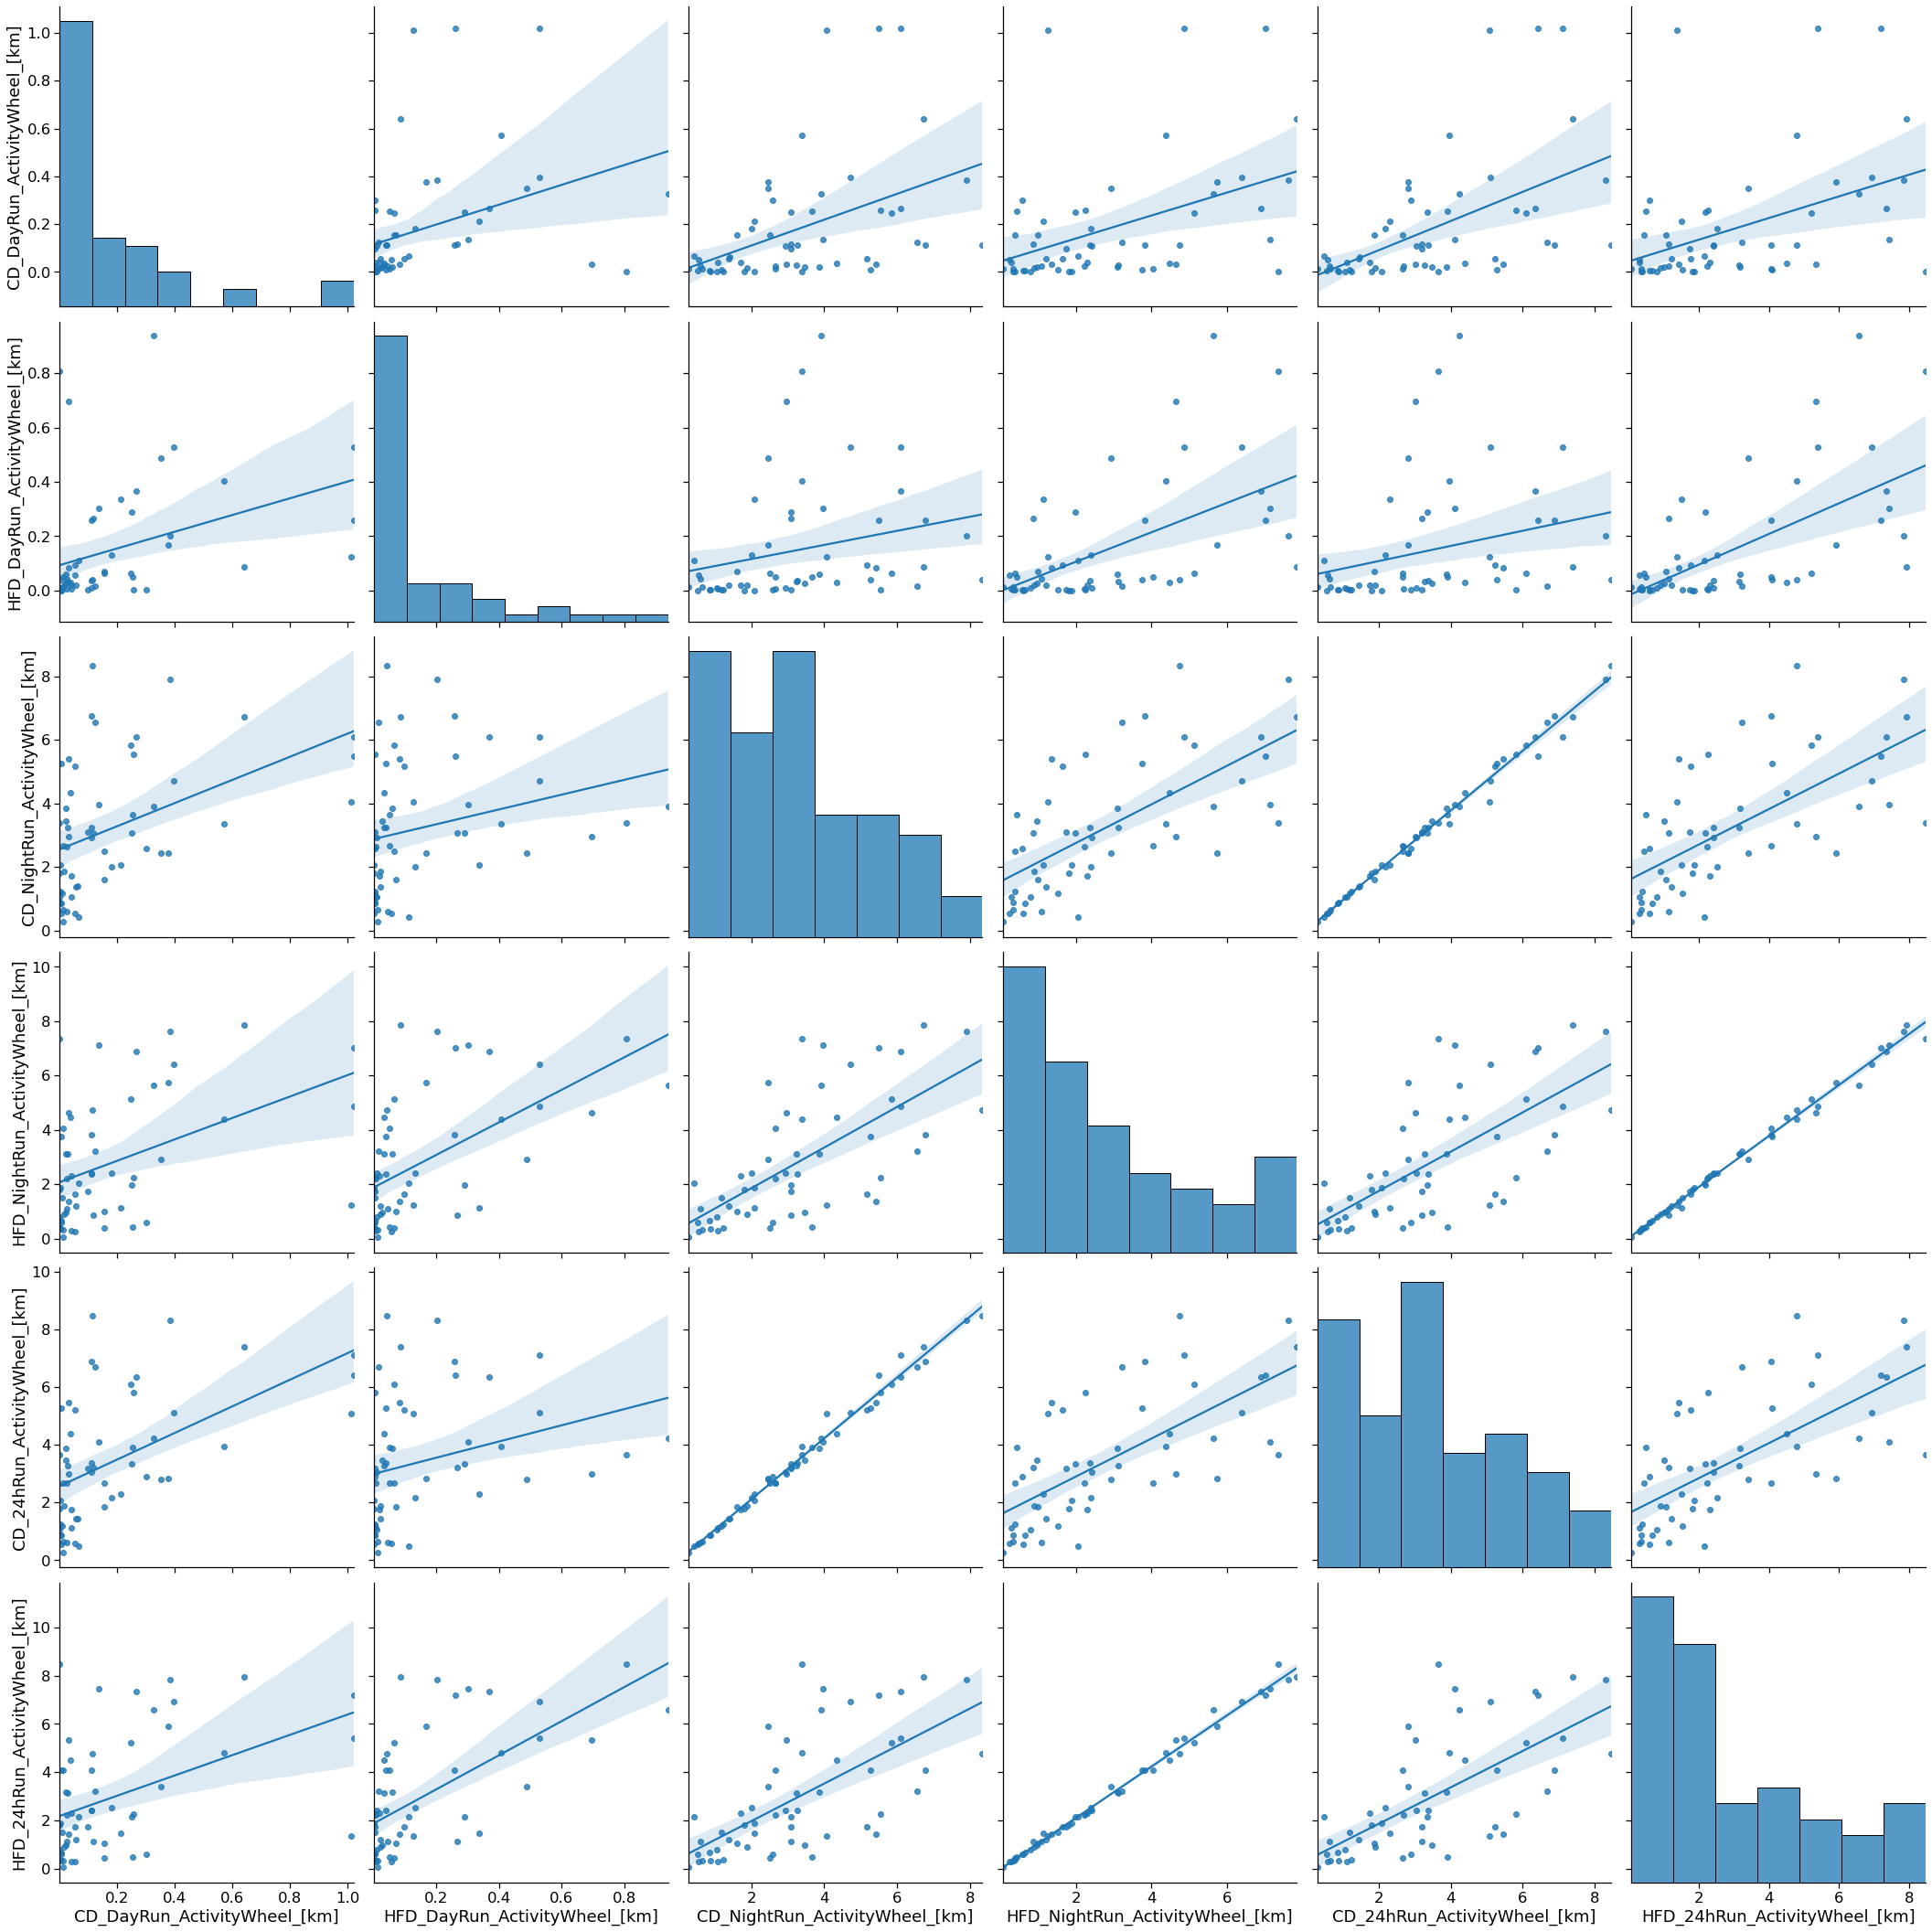

In [9]:
sns.pairplot(phenotypes['Activity Wheel'].iloc[:,0::3], kind='reg', height=5)

### Data formatting

As you can see, the raw data sheets are painful to work with: to compare the same measurements under choline deficient (CD) and high-fat diet (HFD) you have to manually look up and hard-code the column names with both versions. The CD and HFD tags are sometimes used at the beginning of the column names, sometimes at the end, differing from sheet to sheet, sometimes even within the same sheet as well. Occasionally, there are no measurements under the CD or the HFD conditions.

This is the author's fault of not making their Excel-sheets more machine readable, but such is life. We will first have to fix this ourselves.

To simplify further analysis, write a function that can transform a DataFrame from the original format:

~~~~
    @format=column CD_AAA   HFD_AAA   BBB_CD  BBB_HFD
          BXD1      15.0      16.2      76       85     ...
          BXD2      11.6      13.4      91      102
                         ...      
~~~~
into the following format:
~~~~
         strain  diet    AAA   BBB
          BXD1    CD    15.0    76  ...
          BXD1   HFD    16.2    85
          BXD2    CD    11.6    91
          BXD2   HFD    13.4   102
               ...
~~~~
We will ignore the `N` and `SD` columns (replicate counts and standard deviations) and focus on extracting the measurement means only.

One possible way of performig the transformation:
* first, rename that ugly index name (`@format=column`) into something more descriptive: `strain`. You can do this by directly naming the index with `df.index.name = strain`
* Extract all columns containing `CD_` or `_CD` into one DataFrame (`only_cd`), and all columns containing `HFD_` or `_HFD` in another DataFrame (`only_hfd`).
* Rename these DataFrames' columns using a helper function that removes `CD_`, `_CD`, `HFD_` and `_HFD` substrings. (chained replace operations should do the job).
* Insert a new column named `diet` at the beginning of both DataFrames, and fill it with the value `"CD"` for the first one, and `"HFD"` for the second.
* Find the intersection of the two DataFrame's column names (column objects have an `intersection` method) and store it in `shared_cols`. Since most of the measurements were performed under both diets, this will usually result in all, or nearly all of the columns.
* Slice the two dataframes such that only `shared_cols` columns are kept.
* Concatenate the two DataFrames, and sort them by `strain` and `diet`.
* Turn the `strain` and `diet` columns into a joint index. Since this index now has two values, it will be called a `MultiIndex`.
* Wrap all of these steps above into a function named `split_cd_hfd`, which takes a raw DataFrame as input, and returns the re-formatted DataFrame as output.

In [10]:
# Little extra help: the VO2Max table doesn't even follow their own column naming conventions, so we'll fix that first
def rename_vo2_cols(colname):
    return colname.replace('CD', 'CD_').replace('HFD', 'HFD_').replace('__', '_')

phenotypes['VO2Max'].rename(columns=rename_vo2_cols, inplace=True)


### here comes your code
# function of splice cd and hfd
def split_cd_hfd(df):
    
    df.index.name = 'strain'

    # extract column with named cd or hfd
    # pesudo code: only_cd = df.filter(regex='_CD|CD_') or df.loc[:,df.columns.str.contains('_CD|CD_')]
    only_cd = df.loc[:,[col for col in df.columns if 'CD_' in col or '_CD' in col]]
    only_hfd = df.loc[:,[col for col in df.columns if 'HFD_' in col or '_HFD' in col]]

    # rename column with remove cd or hfd
    only_cd.columns = only_cd.columns.str.replace('_CD|CD_', '')
    only_hfd.columns = only_hfd.columns.str.replace('_HFD|HFD_', '')

    # add diet column for label
    only_cd.insert(loc=0, column='diet', value='CD')
    only_hfd.insert(loc=0, column='diet', value='HFD')

    # find same column in cd and hfd
    shared_cols = only_cd.columns.intersection(only_hfd.columns)

    # slice data and remove the data which not contain in shared_cols
    only_cd = only_cd.drop(columns=[col for col in only_cd if col not in shared_cols])
    only_hfd = only_hfd.drop(columns=[col for col in only_hfd if col not in shared_cols])

    # concatenate two datafram and sort
    new_data = pd.concat([only_cd, only_hfd]).sort_values(['strain', 'diet'])

    # setting two index
    index_arrays = [new_data.index.values, new_data['diet'].values]
    new_data.index = pd.MultiIndex.from_arrays(index_arrays, names=('strain', 'diet'))
    new_data = new_data.drop(columns=['diet'])

## another way to do:
    df_both = (pd.concat([only_cd[shared_cols], only_hfd[shared_cols]]) 
              .set_index('diet', append=True)
              .sort_index())
    df_both.columns.name = 'experiment'
    return df_both

### Explore the flexibility that this new representation allows you

Run `split_cd_hfd(...)` on the Activity Wheel sheet and store the result in `df`. Display the top of it with `.head()`.

In [11]:
df = split_cd_hfd(phenotypes['Activity Wheel'])
df.head()

experiment   DayRun_ActivityWheel_[km]  NightRun_ActivityWheel_[km]  \
strain diet                                                           
BXD1   CD                     0.213000                     2.076000   
       HFD                    0.337000                     1.144000   
BXD100 CD                     0.376867                     2.444067   
       HFD                    0.167820                     5.741580   
BXD101 CD                     0.114000                     8.347000   

experiment   24hRun_ActivityWheel_[km]  
strain diet                             
BXD1   CD                     2.288600  
       HFD                    1.488000  
BXD100 CD                     2.820967  
       HFD                    5.909400  
BXD101 CD                     8.460000

Let's say you want to go back to the original, one-column-for-each-diet representation for some purpose. You can do it by running `df.unstack()` which turns the last level of the row MultiIndex (in our case: `diet`) into a new level of the column index. Try it out, and display the head of the resulting DataFrame.

In [12]:
df.unstack().head()

experiment DayRun_ActivityWheel_[km]           NightRun_ActivityWheel_[km]  \
diet                              CD       HFD                          CD   
strain                                                                       
BXD1                        0.213000  0.337000                    2.076000   
BXD100                      0.376867  0.167820                    2.444067   
BXD101                      0.114000  0.040000                    8.347000   
BXD11                       0.039741  0.006720                    1.069127   
BXD12                       0.005781  0.001301                    0.532134   

experiment           24hRun_ActivityWheel_[km]            
diet             HFD                        CD       HFD  
strain                                                    
BXD1        1.144000                  2.288600  1.488000  
BXD100      5.741580                  2.820967  5.909400  
BXD101      4.744000                  8.460000  4.781000  
BXD11       0.278369                  1.110000  0.285088  
BXD12       0.593480                  0.537800  0.594780

You can also turn the row MultiIndex's `diet` level into a regular column of the DataFrame with `df.reset_index('diet')`. If you call `.reset_index()` without any arguments, it will turn every level of the index into a separate column. This is sometimes useful. Try them out.

In [13]:
df.reset_index('diet')

experiment,diet,DayRun_ActivityWheel_[km],NightRun_ActivityWheel_[km],24hRun_ActivityWheel_[km]
strain,,,,
BXD1,CD,0.213000,2.076000,2.288600
BXD1,HFD,0.337000,1.144000,1.488000
BXD100,CD,0.376867,2.444067,2.820967
BXD100,HFD,0.167820,5.741580,5.909400
BXD101,CD,0.114000,8.347000,8.460000
...,...,...,...,...
BXD99,HFD,0.260000,7.010000,7.190000
C57BL/6J,CD,0.110775,6.765900,6.876650
C57BL/6J,HFD,0.258075,3.815375,4.073425


In [14]:
df.stack()

strain  diet  experiment                 
BXD1    CD    DayRun_ActivityWheel_[km]      0.213000
              NightRun_ActivityWheel_[km]    2.076000
              24hRun_ActivityWheel_[km]      2.288600
        HFD   DayRun_ActivityWheel_[km]      0.337000
              NightRun_ActivityWheel_[km]    1.144000
                                               ...   
DBA/2J  CD    NightRun_ActivityWheel_[km]    3.390467
              24hRun_ActivityWheel_[km]      3.651333
        HFD   DayRun_ActivityWheel_[km]      0.807400
              NightRun_ActivityWheel_[km]    7.370660
              24hRun_ActivityWheel_[km]      8.477940
Length: 339, dtype: float64

The previously used `.unstack()` is the inverse operation of `.stack()` which turns the last level of the *column* index into a new level of the *row* index. Try this one too. The resulting DataFrame now has a single column (named `0` by default) with the measurement values for every experiment type. The experiment names turned into row index labels.

Since the column index didn't have a name, the new row index doesn't have a name either. To prevent this, go back to your `split_cd_hfd()` function, and name that column index just before you return the DataFrame. You can do this with `df_to_return.column.name = 'experiment'` before you do `return df_to_return`.

Stacking may not look very useful right now, but several `seaborn` plot types expect the data in a similar, collapsed format, as you will shortly see.

### Compare the two diets with respect to body weight measurements


Take the sheet `Body Wt & Composition`, fix it with `split_cd_hfd()` and slice columns 3-6 (`.iloc[2:6]`) into a new DataFrame named `bodywt`.

Create two side by side histograms to get a visual overview of mice's weight distribution progression under each diet. Use the integrated `bodywt.hist(...)` method to create the histograms. It's worth taking a look at its documentation, so that you can make use of the `diet` index level.

array([<AxesSubplot:title={'center':'CD'}>,
       <AxesSubplot:title={'center':'HFD'}>], dtype=object)

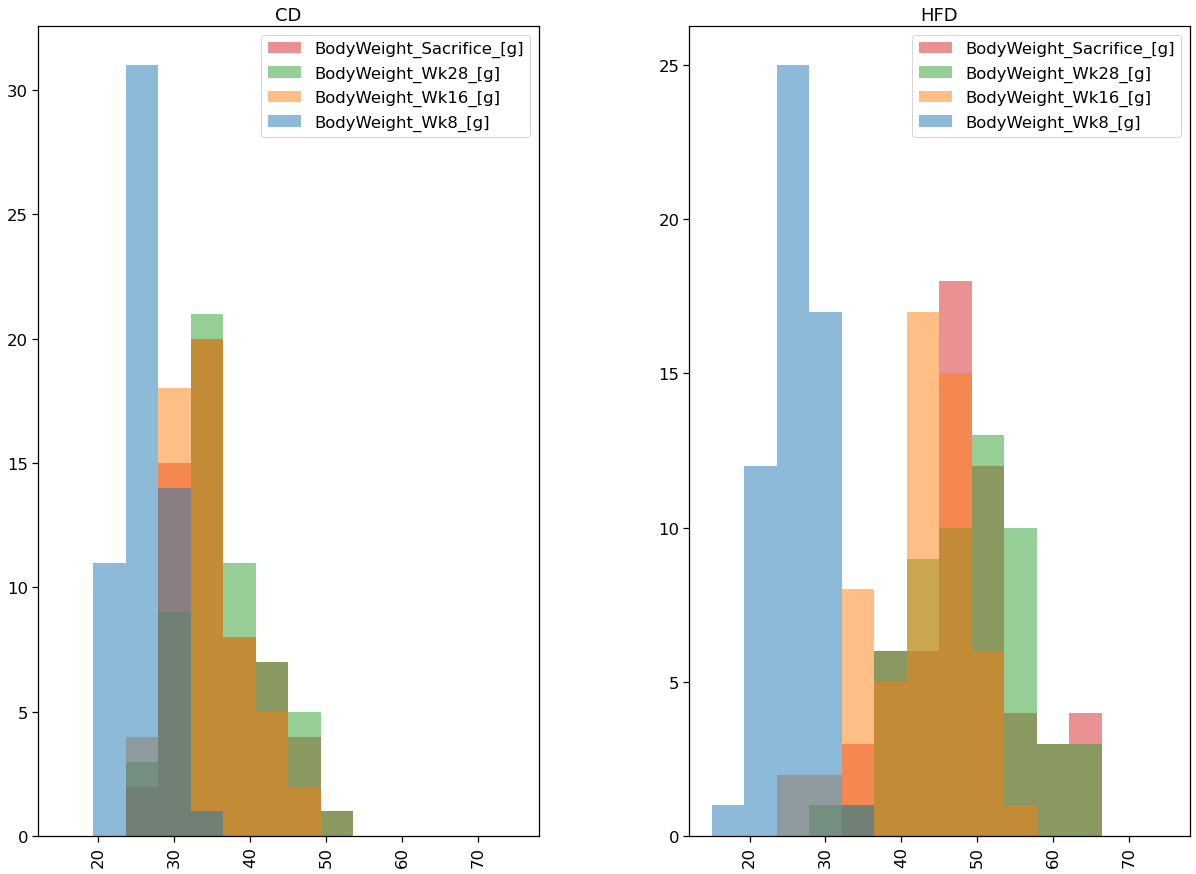

In [15]:
bodywt = split_cd_hfd(phenotypes['Body Wt & Composition']).iloc[:, 2:6]
bodywt.hist(by='diet', histtype='stepfilled', alpha=0.5, legend = True, bins=np.linspace(15,75,15))

### Create a violin plot with the same `bodywt` data

By using seaborn's `violinplot` method, try to generate a plot with four "violins", each of them split left/right based on the diet: i.e. CD on the left side, HFD on the right side.

Seaborn expects the data to be in a very specific format for this task. Study the documentation and/or an example, and find out how you can achieve it with the previously learned `.stack()` and `.reset_index()` methods.

<AxesSubplot:xlabel='experiment', ylabel='0'>

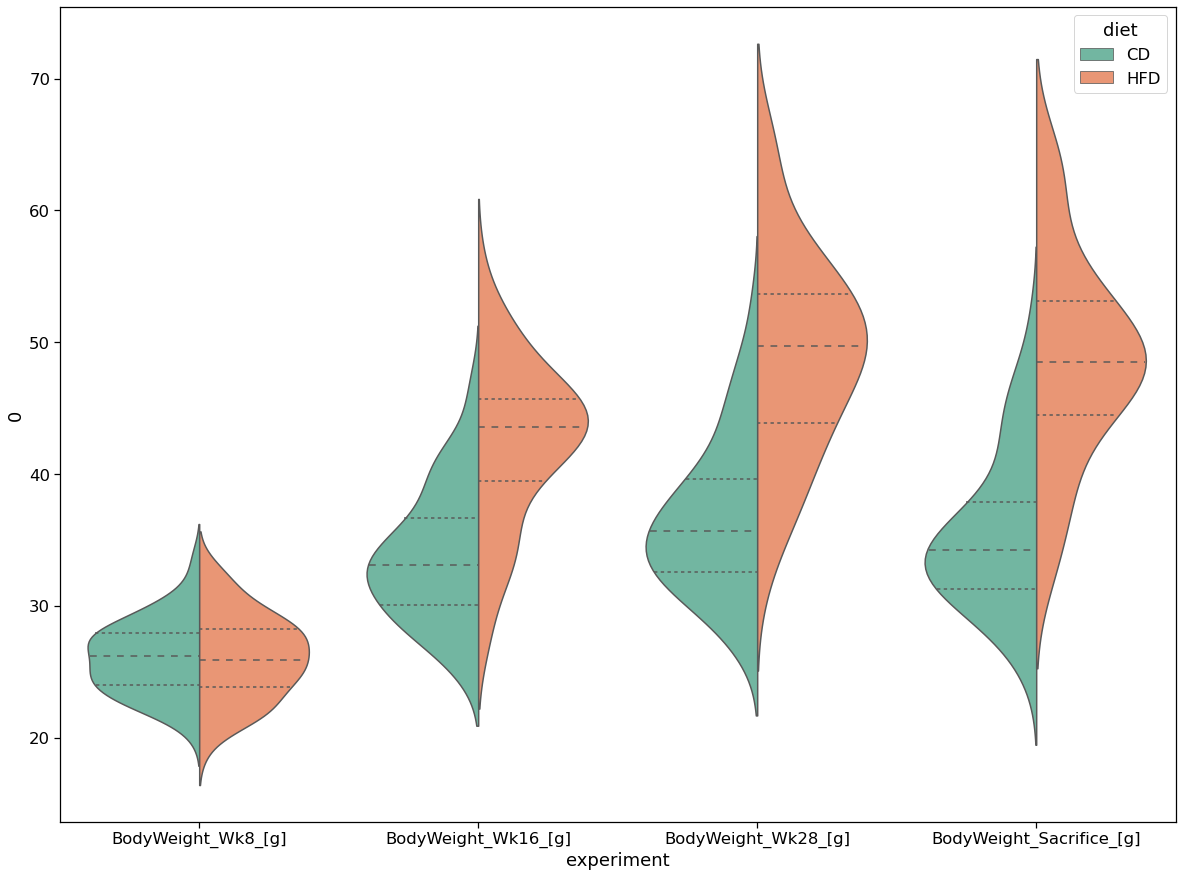

In [16]:
bodywt_trans = bodywt.stack().reset_index('diet').reset_index('experiment')
sns.violinplot(x="experiment",y=0, hue="diet",data=bodywt_trans
               ,palette="Set2", split=True, scale="count", inner="quartile")

### Plot the linear dependence of phenotype pairs, color coded by diet

You had previously created a 6x6 `pairplot` from the raw Activity Wheel columns. Do it again on the "fixed" DataFrame, stratified by diet. Your new pairplot should be a 3x3 grid, and CD and HFD measurements should be displayed on the same plots with different coloring.

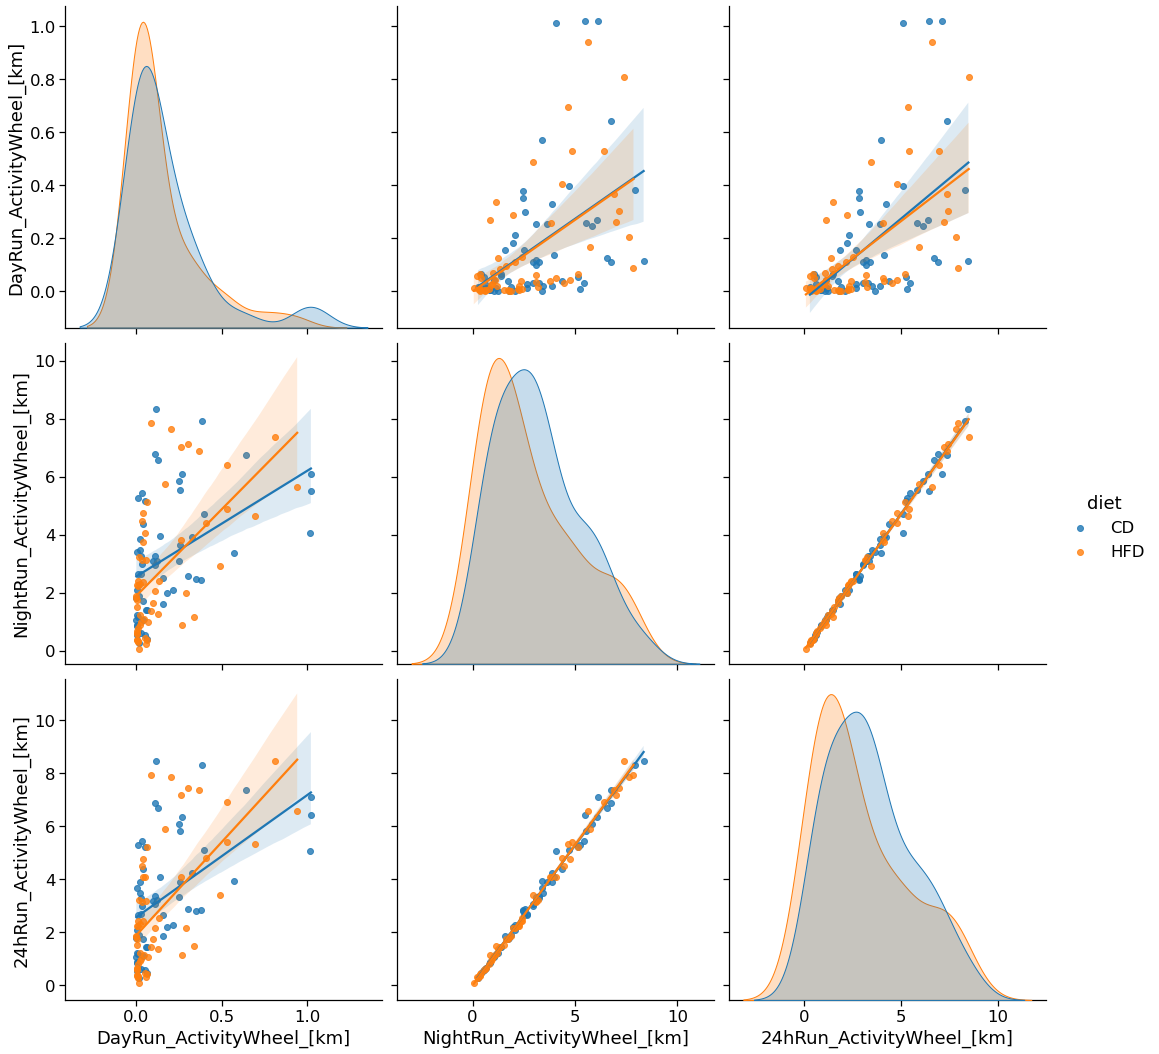

In [17]:
data = split_cd_hfd(phenotypes['Activity Wheel'])
sns.pairplot(data.reset_index('diet'), height=5, kind='reg', hue='diet')

### Explore!

Compare phenotype measurements from different domains. For example, try to see if certain biochemical measurements correlate with fitness measurements or blood parameters. You are free to choose the phenotypes that you compare, but they should be heterogenous.

Pairplots are a great way of visualizing correlations between multiple parameters, but you can play with other kinds of techniques and plots as well. You are given complete freedom here -- try to find something interesting!

In [18]:
NIBP = split_cd_hfd(phenotypes['NIBP'])
weight = split_cd_hfd(phenotypes['Body Wt & Composition']).iloc[:,6]
data = pd.concat([NIBP, weight], axis = 1)
lists = data.columns.to_list()

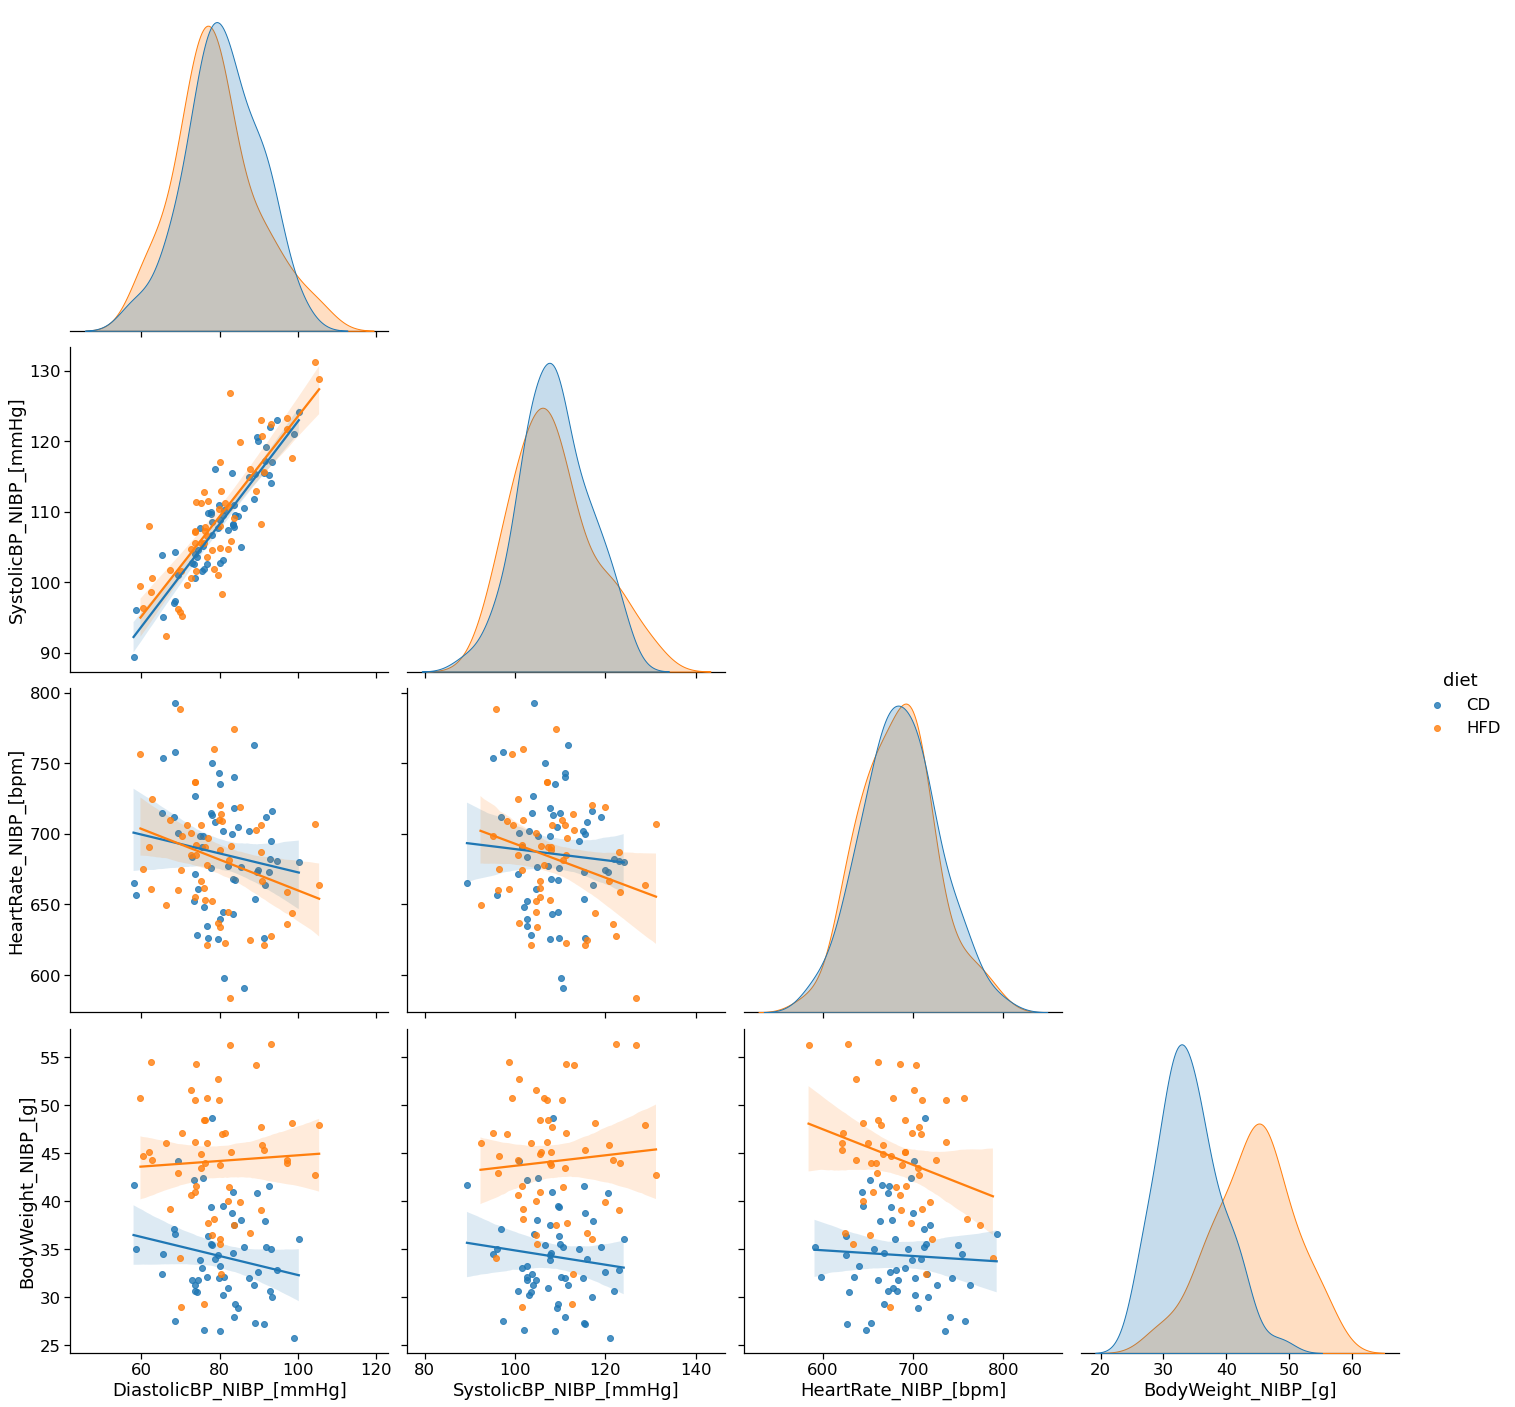

In [19]:
sns.pairplot(data.reset_index("diet"), hue='diet', height=5, kind='reg', corner=True)

It is very interesting here, I want to know whether the body weight will have some correlation with heart rate and Blood Pressure.

As we plot the correlation plot, we can see while body weight increase, the heart rate will decrease. However, it shows different result with correlation bewteen body weight and blood pressure in different diet:

- in HFD, while body weight increase, the blood pressure will increase, showing positive correlation.
- in CD, while body weight increase, the blood pressure decrease, showing negative correltion.

Hence, we can say the factor of diet influent the correlation to body weight.